In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/proojects/House Price.csv


First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values:
 price               0
area                0
bedrooms

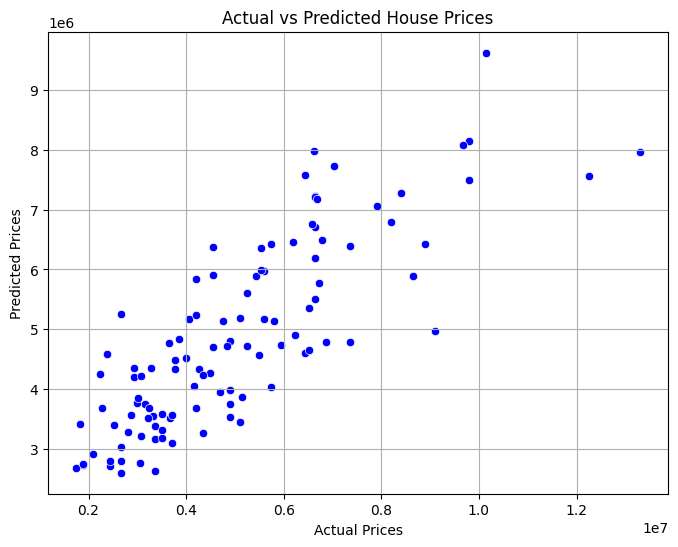


Predicted price for a new house: 4681386.405585102


In [2]:
# house_price_prediction.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('/kaggle/input/proojects/House Price.csv')  # Adjust path if needed

# 2. Preview dataset
print("First 5 rows of the dataset:")
print(df.head())

# 3. Check for missing values and drop them
print("\nMissing values:\n", df.isnull().sum())
df = df.dropna()

# 4. Encode categorical columns to numeric
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns to encode:", list(categorical_cols))

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Define features (X) and target (y)
if 'price' not in df.columns:
    raise ValueError("'price' column is missing from the dataset!")

X = df.drop('price', axis=1)
y = df['price']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate the model
print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 10. Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# 11. Predict a new house price (adjust features to match encoded columns)
# For simplicity, we're using the same features as in training
# You can view feature names using: print(X.columns)
sample_input = pd.DataFrame([X.columns], columns=X.columns)  # placeholder
sample_input.iloc[0] = 0  # initialize all values to 0

# Set values for a sample prediction (replace based on your dataset's features)
sample_input.at[0, 'area'] = 2800
sample_input.at[0, 'bedrooms'] = 4
sample_input.at[0, 'bathrooms'] = 2
sample_input.at[0, 'stories'] = 2
sample_input.at[0, 'parking'] = 2

predicted_price = model.predict(sample_input)
print("\nPredicted price for a new house:", predicted_price[0])


First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values:
 price               0
area                0
bedrooms

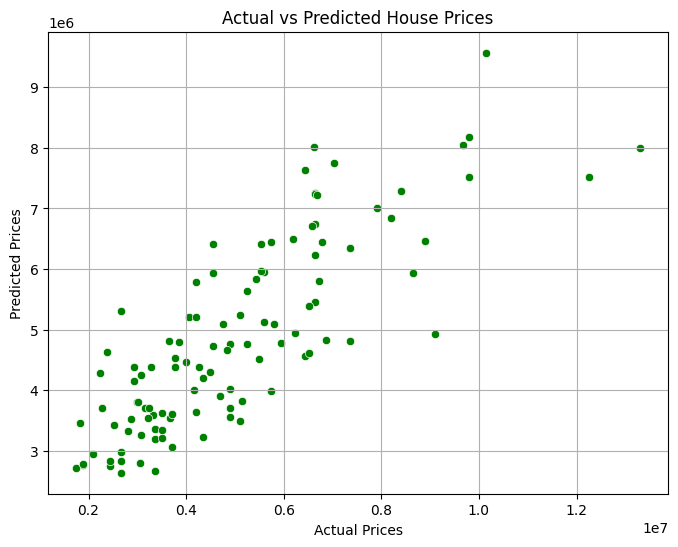


Predicted price for a new house: 4468790.236875849


In [3]:
# alternative_house_price_prediction.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('/kaggle/input/proojects/House Price.csv')  # Adjust this path if needed

# 2. Preview dataset
print("First 5 rows of the dataset:")
print(df.head())

# 3. Handle missing values
print("\nMissing values:\n", df.isnull().sum())
df = df.dropna()

# 4. Encode categorical columns using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns to encode:", list(categorical_cols))

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder if needed later for new input

# 5. Define features and target
if 'price' not in df.columns:
    raise ValueError("'price' column is missing from the dataset!")

X = df.drop('price', axis=1)
y = df['price']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predict on test set
y_pred = model.predict(X_test)

# 9. Evaluate the model
print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 10. Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# 11. Predict price of a new house
# Create a new sample row with encoded values
# Example: if 'furnishing' was encoded as {unfurnished:0, semi-furnished:1, furnished:2}

new_data = {
    'area': 3000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'parking': 1
}

# Add encoded categorical values (update keys based on your dataset)
# For example:
# new_data['furnishing'] = label_encoders['furnishing'].transform(['furnished'])[0]

# Build DataFrame
new_input = pd.DataFrame([new_data])
new_input = new_input.reindex(columns=X.columns, fill_value=0)  # align with training columns

predicted_price = model.predict(new_input)
print("\nPredicted price for a new house:", predicted_price[0])


First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values:
 price               0
area                0
bedrooms

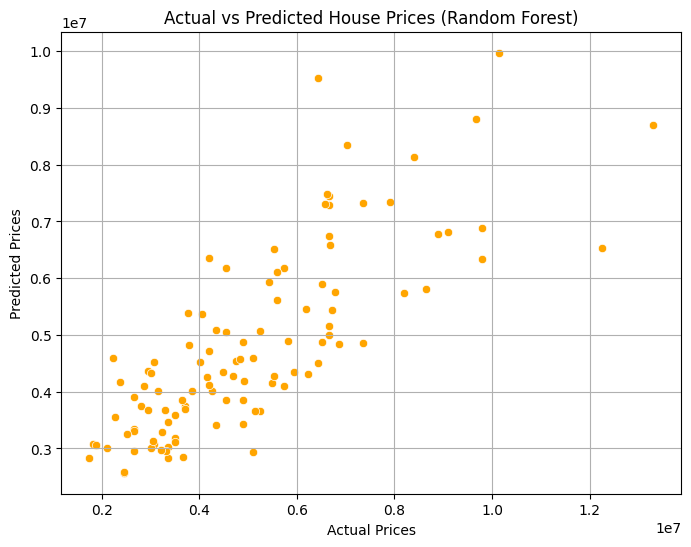


Predicted price for a new house: 4886035.0


In [4]:
# house_price_prediction_rf.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('/kaggle/input/proojects/House Price.csv')  # Change this path as needed

# 2. Preview dataset
print("First 5 rows of the dataset:")
print(df.head())

# 3. Handle missing values
print("\nMissing values:\n", df.isnull().sum())
df = df.dropna()

# 4. Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns to encode:", list(categorical_cols))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Define features and target
if 'price' not in df.columns:
    raise ValueError("'price' column is missing from the dataset!")

X = df.drop('price', axis=1)
y = df['price']

# 6. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predict on test data
y_pred = model.predict(X_test)

# 9. Evaluate the model
print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 10. Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='orange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.grid(True)
plt.show()

# 11. Predict a new house price
# Get a valid feature structure
new_input = pd.DataFrame([0] * X.shape[1], index=X.columns).T

# Fill in sample values — update as per your dataset
new_input.at[0, 'area'] = 2800
new_input.at[0, 'bedrooms'] = 4
new_input.at[0, 'bathrooms'] = 2
new_input.at[0, 'stories'] = 2
new_input.at[0, 'parking'] = 2

# Other categorical dummies default to 0 (already handled)

# Predict price
predicted_price = model.predict(new_input)
print("\nPredicted price for a new house:", predicted_price[0])


Preview:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values:
 price               0
area                0
bedrooms            0
bathr

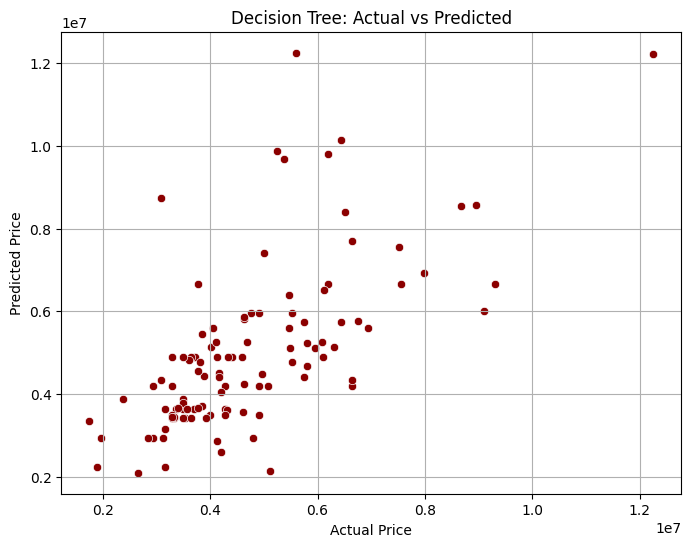


Predicted price for new house: 3885000.0


In [5]:
# house_price_prediction_tree.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('/kaggle/input/proojects/House Price.csv')

# 2. Overview
print("Preview:\n", df.head())

# 3. Handle missing data
print("\nMissing values:\n", df.isnull().sum())
df = df.dropna()

# 4. Encode categoricals
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(categorical_cols))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Define X and y
X = df.drop('price', axis=1)
y = df['price']

# 6. Split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 7. Train model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# 8. Predict
y_pred = model.predict(X_test)

# 9. Evaluation
print("\nEvaluation Metrics:")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# 10. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='darkred')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.show()

# 11. New prediction
sample = pd.DataFrame([0] * X.shape[1], index=X.columns).T
sample.at[0, 'area'] = 2700
sample.at[0, 'bedrooms'] = 3
sample.at[0, 'bathrooms'] = 2
sample.at[0, 'stories'] = 2
sample.at[0, 'parking'] = 1

pred = model.predict(sample)
print("\nPredicted price for new house:", pred[0])


First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values:
 price               0
area                0
bedrooms            0


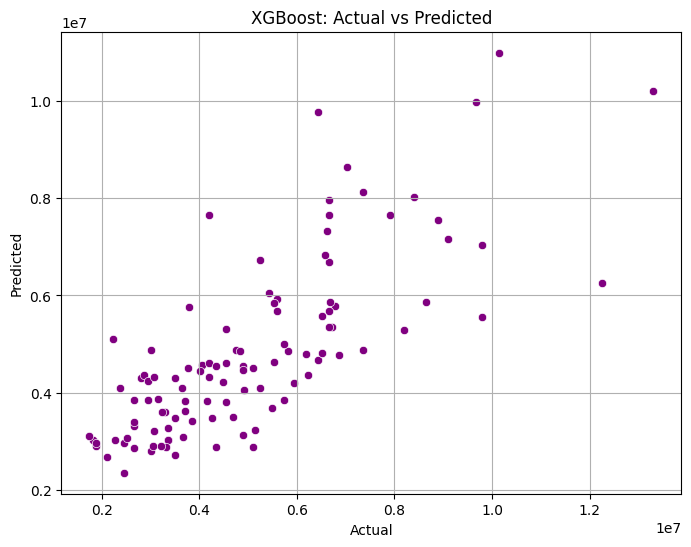


Predicted price for new house: 4762802.5


In [6]:
# house_price_prediction_xgb.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('/kaggle/input/proojects/House Price.csv')

# 2. Preview
print("First 5 rows:\n", df.head())

# 3. Handle missing values
print("\nMissing values:\n", df.isnull().sum())
df = df.dropna()

# 4. Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nEncoding:", list(categorical_cols))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Features and target
X = df.drop('price', axis=1)
y = df['price']

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
model = XGBRegressor()
model.fit(X_train, y_train)

# 8. Predict
y_pred = model.predict(X_test)

# 9. Evaluate
print("\nEvaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# 10. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()

# 11. Predict new house
sample = pd.DataFrame([0] * X.shape[1], index=X.columns).T
sample.at[0, 'area'] = 3000
sample.at[0, 'bedrooms'] = 3
sample.at[0, 'bathrooms'] = 2
sample.at[0, 'stories'] = 2
sample.at[0, 'parking'] = 1

pred = model.predict(sample)
print("\nPredicted price for new house:", pred[0])
